In [ ]:
import torch
import numpy as np
from torch.utils.data import TensorDataset
import pandas as pd
import json

In [38]:
test = pd.read_csv("dataset/test_preprocessed_buckets.csv")
train = pd.read_csv("dataset/train_preprocessed_buckets.csv")

In [ ]:
print(train.columns)
print(test.columns)
print(train.shape)
print(test.shape)

In [39]:
dropColumns = [
    "SERIAL",
    "PERNUM",
    "HHWT",
    "CLUSTER",
    "STRATA",
    "PERWT",
    "RACNUM",
    "YRMARR",
    "YRNATUR",
    # "WKSWORK1",
    # "UHRSWORK",
    # "TRANTIME",
    "index",
]

test = test.drop(columns=dropColumns)
train = train.drop(columns=dropColumns)

# finds = [
# 	"AGE",
# 	"hasDegree",
# 	"worksIn",
# 	"occupation",
# 	"isFemale",
# 	"isAmericanIndian",
# 	"isAsian",
# 	"isBlack",
# 	"isPacificIslander",
# 	"isWhite",
# 	"isOtherRace",
# 	"isHispanic",
# ]


# for column in test.columns:
# 	found = False
# 	for find in finds:
# 		if(column.find(find) != -1):
# 			found = True
# 			break
# 	if(not found):
# 		test = test.drop(columns=column)
# 		train = train.drop(columns=column)

for column in test.columns:
	test[column].fillna(False, inplace=True)
 
for column in train.columns:
	train[column].fillna(False, inplace=True)


In [40]:
#Remove all rows with INCWAGE_CPIU_2010 as 0
# train = train[train.INCWAGE_CPIU_2010 != 0]
# test = test[test.INCWAGE_CPIU_2010 != 0]

In [41]:
# train['HOURS'] = train['WKSWORK1'] * train['UHRSWORK']
# train = train.drop(columns=['WKSWORK1', 'UHRSWORK'])

# test['HOURS'] = test['WKSWORK1'] * test['UHRSWORK']
# test = test.drop(columns=['WKSWORK1', 'UHRSWORK'])

In [42]:
for column in test.columns:
	test[column] = test[column].astype(np.float32)

for column in train.columns:
	train[column] = train[column].astype(np.float32)


with open("dataset/columns.json", "w") as f:
	json.dump((test.drop(columns=['INCWAGE_CPIU_2010'])).columns.tolist(), f)

In [43]:
salaryDivisor = 1
salaryCutoff = 100000
finalShift = 0

In [44]:
xTrain = train.drop(columns=['INCWAGE_CPIU_2010'])
yTrain = train['INCWAGE_CPIU_2010']
xTest = test.drop(columns=['INCWAGE_CPIU_2010'])
yTest = test['INCWAGE_CPIU_2010']

In [45]:
yTrain = yTrain.clip(upper=salaryCutoff)
yTest = yTest.clip(upper=salaryCutoff)

In [46]:
yTrain = yTrain / salaryDivisor
yTest = yTest / salaryDivisor

In [47]:
yTrain = yTrain - finalShift
yTest = yTest - finalShift

In [48]:
AGE_mean = xTrain['AGE'].mean()
WKSWORK1_mean = xTrain['WKSWORK1'].mean()
UHRSWORK_mean = xTrain['UHRSWORK'].mean()
TRANTIME_mean = xTrain['TRANTIME'].mean()
# HOURS_mean = xTrain['HOURS'].mean()

xTrain['AGE'] = xTrain['AGE'] - AGE_mean
xTest['AGE'] = xTest['AGE'] - AGE_mean

xTrain['WKSWORK1'] = xTrain['WKSWORK1'] - WKSWORK1_mean
xTest['WKSWORK1'] = xTest['WKSWORK1'] - WKSWORK1_mean

xTrain['UHRSWORK'] = xTrain['UHRSWORK'] - UHRSWORK_mean
xTest['UHRSWORK'] = xTest['UHRSWORK'] - UHRSWORK_mean

xTrain['TRANTIME'] = xTrain['TRANTIME'] - TRANTIME_mean
xTest['TRANTIME'] = xTest['TRANTIME'] - TRANTIME_mean

# xTrain['HOURS'] = xTrain['HOURS'] - HOURS_mean
# xTest['HOURS'] = xTest['HOURS'] - HOURS_mean


In [49]:
AGE_std = xTrain['AGE'].std()
WKSWORK1_std = xTrain['WKSWORK1'].std()
UHRSWORK_std = xTrain['UHRSWORK'].std()
TRANTIME_std = xTrain['TRANTIME'].std()
# HOURS_std = xTrain['HOURS'].std()


xTrain['AGE'] = xTrain['AGE'] / AGE_std
xTest['AGE'] = xTest['AGE'] / AGE_std

xTrain['WKSWORK1'] = xTrain['WKSWORK1'] / WKSWORK1_std
xTest['WKSWORK1'] = xTest['WKSWORK1'] / WKSWORK1_std

xTrain['UHRSWORK'] = xTrain['UHRSWORK'] / UHRSWORK_std
xTest['UHRSWORK'] = xTest['UHRSWORK'] / UHRSWORK_std

xTrain['TRANTIME'] = xTrain['TRANTIME'] / TRANTIME_std
xTest['TRANTIME'] = xTest['TRANTIME'] / TRANTIME_std

# xTrain['HOURS'] = xTrain['HOURS'] / HOURS_std
# xTest['HOURS'] = xTest['HOURS'] / HOURS_std


In [50]:
# xTrain['AGE'] = xTrain['AGE'] / 100
# xTest['AGE'] = xTest['AGE'] / 100

# xTrain['WKSWORK1'] = xTrain['WKSWORK1'] / 52
# xTest['WKSWORK1'] = xTest['WKSWORK1'] / 52

# xTrain['UHRSWORK'] = xTrain['UHRSWORK'] / 168
# xTest['UHRSWORK'] = xTest['UHRSWORK'] / 168

# xTrain['TRANTIME'] = xTrain['TRANTIME'] / 163
# xTest['TRANTIME'] = xTest['TRANTIME'] / 163

In [51]:
print(yTrain)
print(yTest)

0           49273.0
1           49273.0
2           58659.0
3           97765.0
4           31285.0
             ...   
1231492     50838.0
1231493     35195.0
1231494    100000.0
1231495      2190.0
1231496     32849.0
Name: INCWAGE_CPIU_2010, Length: 1231497, dtype: float64
0          62569.0
1          39106.0
2         100000.0
3          28156.0
4          91508.0
            ...   
217319     39106.0
217320     19553.0
217321     15642.0
217322     40670.0
217323     23464.0
Name: INCWAGE_CPIU_2010, Length: 217324, dtype: float64


In [52]:
xTrainTensor = torch.tensor(xTrain.values, dtype=torch.float32)
yTrainTensor = torch.tensor(yTrain.values, dtype=torch.float32)

xTestTensor = torch.tensor(xTest.values, dtype=torch.float32)
yTestTensor = torch.tensor(yTest.values, dtype=torch.float32)

In [53]:
print(xTrainTensor.shape)
print(yTrainTensor.shape)
print(xTestTensor.shape)
print(yTestTensor.shape)

torch.save(xTrainTensor, 'dataset/trainSetX.pt')
torch.save(yTrainTensor, 'dataset/trainSetY.pt')

torch.save(xTestTensor, 'dataset/testSetX.pt')
torch.save(yTestTensor, 'dataset/testSetY.pt')

torch.Size([1231497, 573])
torch.Size([1231497])
torch.Size([217324, 573])
torch.Size([217324])


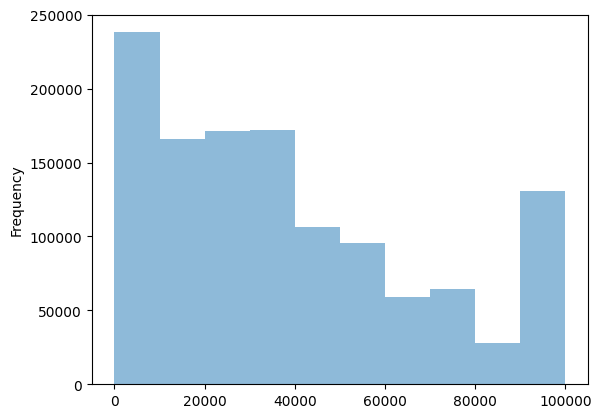

In [54]:
ax1 = yTrain.plot.hist(bins=10, alpha=0.5)